In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:/Project/data/telco_cleaned.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## 1. Creating Tenure Groups
Customer with different Tenure lengths behave differently

In [4]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 48, 72],
    labels=['New', 'Mid-Term', 'Long-Term']
)


In [5]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')


## 2. Number of Services used 

Combine columns like 'PhoneService', 'OnlineSecurity', 'OnlineBackup'etc. to find how many services a customer uses

In [6]:
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity','OnlineBackup', 
                'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']

df[service_cols] = df[service_cols].replace({'No internet service': 'No', 'No phone service': 'No'})

df['NumServicesUsed'] = df[service_cols].apply(lambda row: row[row == 'Yes'].count(), axis=1)

## 3. Senior Citizen Binary

Converting SeniorCitizen from 0/1 to Yes/No 

In [7]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

## 4. Monthly Charges Bucket

Customers with higher monthly bills may churn more

In [8]:
df['MonthlyChargeGroup'] = pd.cut(
    df['MonthlyCharges'],
    bins=[0,35,70,120],
    labels=['Low', 'Medium', 'High']
)

## 5. Interaction Features

Create interaction features to capture combined effects

In [9]:
df['IsFiber_and_TechSupport'] = ((df['InternetService'] == 'Fiber optic') & (df['TechSupport'] == 'No')).astype(int)

## 6. Drop Redundant Columns

In [10]:
df.drop(['customerID'], axis=1, inplace=True)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,NumServicesUsed,MonthlyChargeGroup,IsFiber_and_TechSupport
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,New,1,Low,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,Mid-Term,3,Medium,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New,3,Medium,0
3,Male,No,No,No,45,No,No,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Mid-Term,3,Medium,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New,1,High,1


for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip().str.lower()

In [12]:
print(df['SeniorCitizen'].value_counts())

SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64


df.info()

df.head()

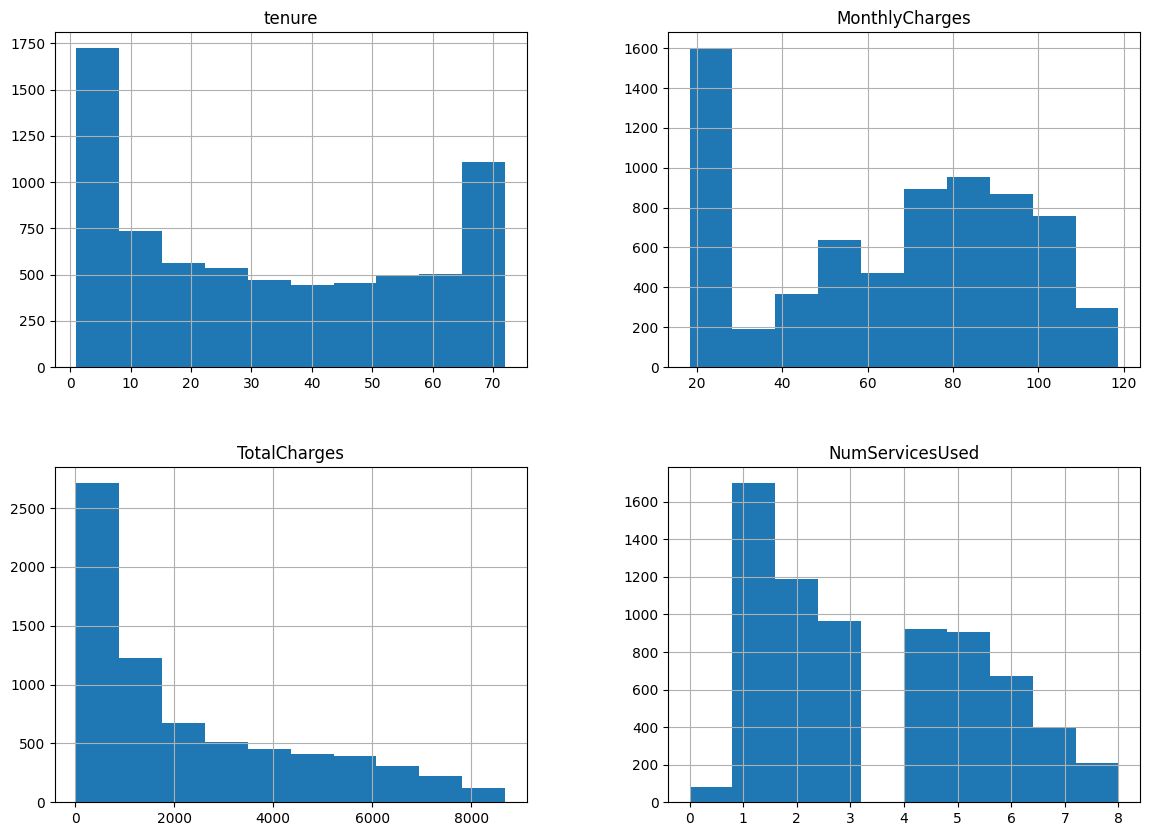

In [13]:
# Histogram for all numerical features
nums_col = df.select_dtypes(include=['float64', 'int64']).columns
df[nums_col].hist(figsize=(14,10))
plt.show()

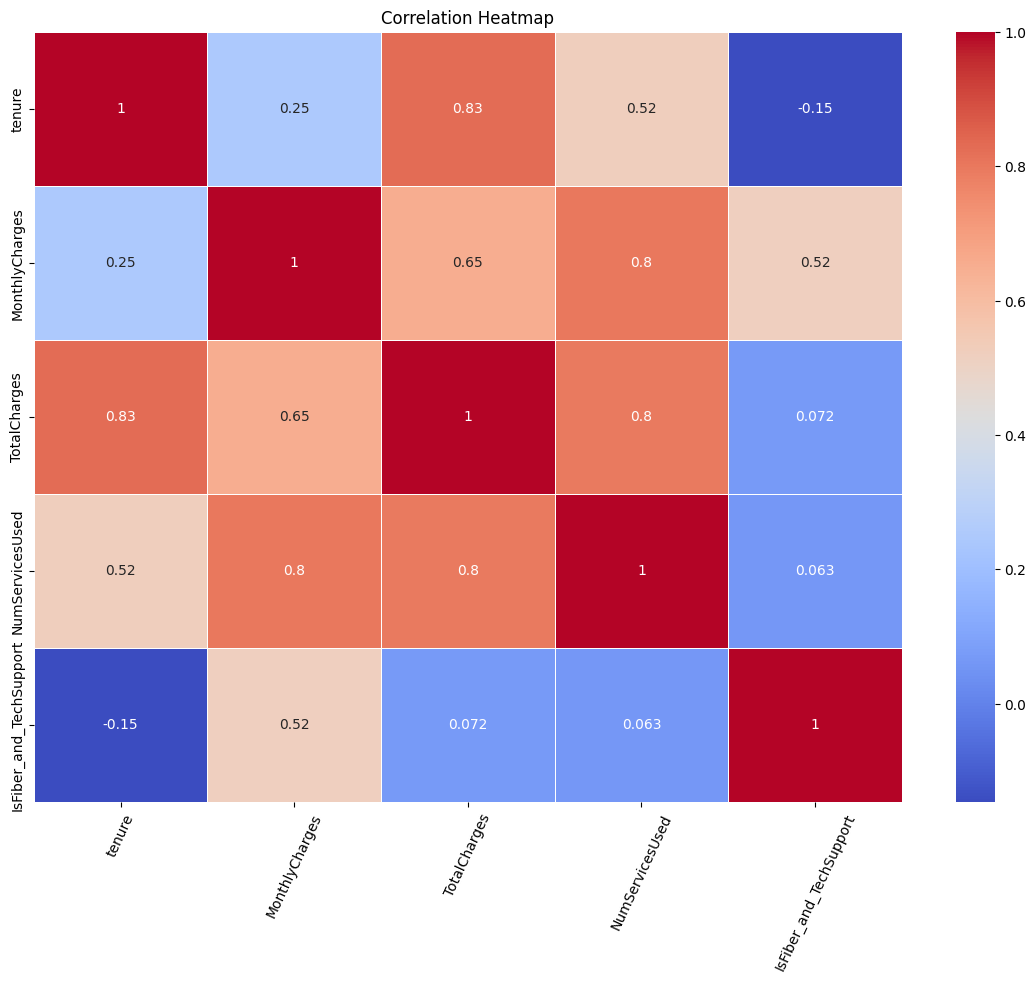

In [14]:
# Correlation Matrix
corr = df.corr(numeric_only = True)
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=65)
plt.show()

In [15]:
df.to_csv('D:/Project/data/telco_feature_engineered.csv', index=False)